In [1]:
import os
import sys
import numpy as np
import pandas as pd
import math as mt
sys.path.insert(0, os.path.abspath('..'))

from autocnet.matcher.outlier_detector import SpatialSuppression

from IPython.display import display

%pylab inline


Populating the interactive namespace from numpy and matplotlib


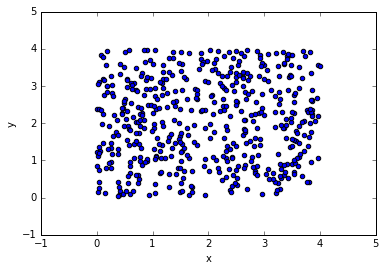

In [116]:
r = np.random.RandomState(12345)
df = pd.DataFrame(r.uniform(0,4,(500, 3)), columns=['x', 'y', 'strength'])
minimum = SpatialSuppression(df, (4, 4), k = 1, error_k = .01)

minimum.suppress()
df.plot(kind = 'scatter', x = 'x', y = 'y')

/scratch/anaconda3/envs/autocnet_k/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


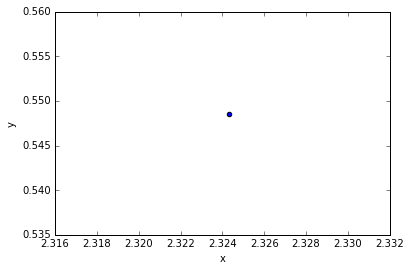

In [117]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')
if len(df[minimum.mask]) not in range(minimum.k-(int(mt.ceil(minimum.error_k*minimum.k)))+1, minimum.k+(int(mt.ceil(minimum.error_k*minimum.k)))+1):
    raise ValueError('Number of points not in range.') 

(100, 100)


/home/acpaquette/autocnet/autocnet/matcher/outlier_detector.py:260: UserWarning: Unable to optimally solve.  Returning with 56 points
  warnings.warn('Unable to optimally solve.  Returning with {} points'.format(len(result)))


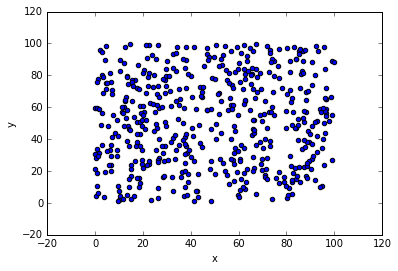

In [51]:
r = np.random.RandomState(12345)
df = pd.DataFrame(r.uniform(0,100,(500, 3)), columns=['x', 'y', 'strength'])
minimum = SpatialSuppression(df, (100,100), k = 50, error_k = .1)

print(minimum.domain)
minimum.suppress()
df.plot(kind = 'scatter', x = 'x', y = 'y')

43
57
56


/scratch/anaconda3/envs/autocnet_k/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


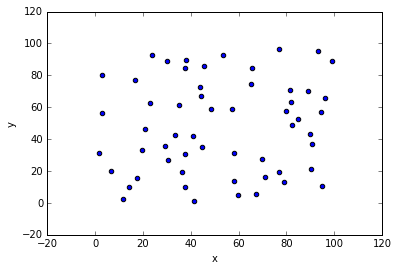

In [55]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')
print(minimum.k-(int(mt.ceil(minimum.error_k*minimum.k)))-2)
print(minimum.k+(int(mt.ceil(minimum.error_k*minimum.k)))+2)
print(len(df[minimum.mask]))
if len(df[minimum.mask]) not in range(minimum.k-(int(mt.ceil(minimum.error_k*minimum.k)))-2, minimum.k+(int(mt.ceil(minimum.error_k*minimum.k)))+2):
    raise ValueError('Number of points not in range.') 

46
56
56


/scratch/anaconda3/envs/autocnet_k/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


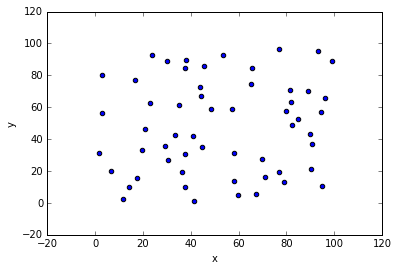

In [56]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')
if len(df[minimum.mask]) not in range(minimum.k-(int(mt.ceil(minimum.error_k*minimum.k)))-2, minimum.k+(int(mt.ceil(minimum.error_k*minimum.k)))+2):
    raise ValueError('Number of points not in range.') 